In [545]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [547]:
df = pd.read_csv("train.csv")
df

/var/folders/dh/33z47vpj40s235p36bcdhcxm0000gn/T/ipykernel_1493/1862463380.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [549]:
# Drop redundant rows
df.drop(['ID', 'Customer_ID', 'Name', 'SSN', 'Month'], axis=1, inplace=True)

In [551]:
# Drop Null columns
df.dropna(inplace=True)

In [553]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)
df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
6,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
8,28_,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,28,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
10,28,Teacher,34847.84_,3037.986667,2,1385,6,1,Credit-Builder Loan,3,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,410.256158,Poor
99995,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor


In [555]:
# Sort out Age Outliers

# Convert Age column to numeric (coerce errors to NaN)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Calculate median of valid ages (0 <= age <= 150)
valid_age_median = df.loc[(df['Age'] >= 0) & (df['Age'] <= 150), 'Age'].median()

# Replace invalid ages with median
df.loc[(df['Age'] < 0) | (df['Age'] > 150), 'Age'] = valid_age_median

df.dropna(inplace=True)
df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
6,23.0,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
9,28.0,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
10,28.0,Teacher,34847.84_,3037.986667,2,1385,6,1,Credit-Builder Loan,3,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard
12,28.0,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.11542024292334,Low_spent_Small_value_payments,444.8670318506144,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,410.256158,Poor
99995,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,25.0,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor


In [557]:
#Sort out Occupation 

df = df[df['Occupation'] != '_______']
df = df[df['Payment_Behaviour'] != '!@9#%8']

df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
6,23.0,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
9,28.0,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
10,28.0,Teacher,34847.84_,3037.986667,2,1385,6,1,Credit-Builder Loan,3,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard
12,28.0,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.11542024292334,Low_spent_Small_value_payments,444.8670318506144,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,29.0,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,...,Bad,3571.7,37.140784,6 Years and 3 Months,Yes,60.964772,34.66290609052614,High_spent_Large_value_payments,337.362988,Standard
99994,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,410.256158,Poor
99995,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor


In [559]:
# Step 2: Initialize and apply LabelEncoder
le = LabelEncoder()
df['Occupation'] = le.fit_transform(df['Occupation'])
df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,12,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
6,23.0,12,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
9,28.0,13,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
10,28.0,13,34847.84_,3037.986667,2,1385,6,1,Credit-Builder Loan,3,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard
12,28.0,13,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.11542024292334,Low_spent_Small_value_payments,444.8670318506144,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,29.0,1,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,...,Bad,3571.7,37.140784,6 Years and 3 Months,Yes,60.964772,34.66290609052614,High_spent_Large_value_payments,337.362988,Standard
99994,25.0,9,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,410.256158,Poor
99995,25.0,9,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,25.0,9,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor


In [561]:
# Function cleans numerical columns, imputes missing values, detects outliers through max outlier detection, 
# drops null rows if still prsent
def clean_numerical_columns(df, numerical_cols):
    df = df.copy()

    for col in numerical_cols:
        # Step 1: Remove unwanted chars, keep only digits and decimal points as strings
        cleaned_str = df[col].astype(str).str.replace(r'[^0-9.]', '', regex=True)

        # Step 2: Convert cleaned strings explicitly to float
        cleaned_float = pd.to_numeric(cleaned_str, errors='coerce')

        df.loc[:, col] = cleaned_float

        # Step 3: Impute missing values with median (median must be float)
        median = df[col].median()
        df.loc[:, col] = df[col].fillna(median).astype(float)

        # Step 4: Remove outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    # Step 5: Drop any remaining rows with NaNs in these columns
    df = df.dropna(subset=numerical_cols)

    return df


In [563]:
nc = ['Annual_Income', 'Monthly_Inhand_Salary', 
      'Num_Bank_Accounts', 'Num_Credit_Card',
      'Interest_Rate', 'Delay_from_due_date',
      'Num_Credit_Inquiries','Credit_Utilization_Ratio',
      'Total_EMI_per_month','Num_of_Loan',
      'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
      'Outstanding_Debt', 'Amount_invested_monthly',
      'Monthly_Balance']
dfc = clean_numerical_columns(df, nc)
dfc

/var/folders/dh/33z47vpj40s235p36bcdhcxm0000gn/T/ipykernel_1493/3431741422.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, col] = df[col].fillna(median).astype(float)
/var/folders/dh/33z47vpj40s235p36bcdhcxm0000gn/T/ipykernel_1493/3431741422.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, col] = df[col].fillna(median).astype(float)
/var/folders/dh/33z47vpj40s235p36bcdhcxm0000gn/T/ipykernel_1493/3431741422.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a futur

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,12,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
6,23.0,12,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
9,28.0,13,34847.84,3037.986667,2,4,6,1.0,Credit-Builder Loan,7,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
12,28.0,13,34847.84,3037.986667,2,4,6,1.0,Credit-Builder Loan,3,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.11542,Low_spent_Small_value_payments,444.867032,Good
13,28.0,13,34847.84,3037.986667,2,4,6,1.0,Credit-Builder Loan,3,...,Good,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.47719,High_spent_Large_value_payments,481.505262,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99988,28.0,1,20002.88,1929.906667,10,8,29,5.0,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,...,_,3571.7,28.508250,6 Years and 0 Months,Yes,60.964772,213.97801,Low_spent_Small_value_payments,208.047884,Standard
99991,29.0,1,20002.88,1929.906667,10,8,29,5.0,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,...,Bad,3571.7,37.140784,6 Years and 3 Months,Yes,60.964772,34.662906,High_spent_Large_value_payments,337.362988,Standard
99994,25.0,9,39628.99,3359.415833,4,6,7,2.0,"Auto Loan, and Student Loan",20,...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.581403,High_spent_Medium_value_payments,410.256158,Poor
99995,25.0,9,39628.99,3359.415833,4,6,7,2.0,"Auto Loan, and Student Loan",23,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor


In [565]:
# Cleans categorical data, first imputes null to missing or different categorical data, then label encode
def clean_and_label_encode(dfc, cat_cols):
    dfc = dfc.copy()
    label_encoders = {}

    for col in cat_cols:
        # Convert to string and strip whitespace
        dfc[col] = dfc[col].astype(str).str.strip()

        # Placeholders to treat as missing
        placeholders = ['NM', 'NA', '_', 'nan', 'NaN', 'None']

        # Replace placeholders with NaN
        dfc.loc[dfc[col].isin(placeholders), col] = np.nan

        # Impute missing with mode
        mode_val = dfc[col].mode()
        if not mode_val.empty:
            dfc[col].fillna(mode_val[0], inplace=True)
        else:
            dfc[col].fillna('Unknown', inplace=True)

        # Label encode
        le = LabelEncoder()
        dfc[col] = le.fit_transform(dfc[col])

        label_encoders[col] = le

    return dfc, label_encoders


In [587]:
categorical_columns = [
    'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age', 
    'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'
]
dfc2, encoders = clean_and_label_encode(dfc, categorical_columns)
dfc2

/var/folders/dh/33z47vpj40s235p36bcdhcxm0000gn/T/ipykernel_1493/3191068402.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfc[col].fillna(mode_val[0], inplace=True)
/var/folders/dh/33z47vpj40s235p36bcdhcxm0000gn/T/ipykernel_1493/3191068402.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,12,19114.12,1824.843333,3,4,3,4.0,124,3,...,2,809.98,26.822620,180,0,49.574949,80.415295,2,312.494089,0
6,23.0,12,19114.12,1824.843333,3,4,3,4.0,124,3,...,1,809.98,22.537593,188,0,49.574949,178.344067,5,244.565317,0
9,28.0,13,34847.84,3037.986667,2,4,6,1.0,669,7,...,1,605.03,38.550848,237,0,18.816215,40.391238,0,484.591214,0
12,28.0,13,34847.84,3037.986667,2,4,6,1.0,669,3,...,1,605.03,34.977895,230,0,18.816215,130.11542,5,444.867032,0
13,28.0,13,34847.84,3037.986667,2,4,6,1.0,669,3,...,1,605.03,33.381010,239,0,18.816215,43.47719,0,481.505262,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99988,28.0,1,20002.88,1929.906667,10,8,29,5.0,4828,33,...,2,3571.7,28.508250,356,1,60.964772,213.97801,5,208.047884,2
99991,29.0,1,20002.88,1929.906667,10,8,29,5.0,4828,33,...,0,3571.7,37.140784,361,1,60.964772,34.662906,0,337.362988,2
99994,25.0,9,39628.99,3359.415833,4,6,7,2.0,668,20,...,2,502.38,39.323569,306,0,35.104023,140.581403,1,410.256158,1
99995,25.0,9,39628.99,3359.415833,4,6,7,2.0,668,23,...,2,502.38,34.663572,307,0,35.104023,60.971333,0,479.866228,1


In [589]:
# Get the encoder for 'Credit_Score'
credit_score_encoder = encoders['Credit_Score']

# Map original categories to encoded integers
mapping = dict(zip(credit_score_encoder.classes_, credit_score_encoder.transform(credit_score_encoder.classes_)))

print(mapping)

{'Good': 0, 'Poor': 1, 'Standard': 2}


In [591]:
#Split into train test split 
X = dfc2.drop(columns=["Credit_Score"])
y = dfc2["Credit_Score"]

In [593]:
y

0        0
6        0
9        0
12       0
13       0
        ..
99988    2
99991    2
99994    1
99995    1
99996    1
Name: Credit_Score, Length: 37085, dtype: int64

In [595]:
scale_cols = [col for col in X.columns]

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform, normalize the data
X[scale_cols] = scaler.fit_transform(X[scale_cols])
X

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0.070312,0.857143,0.069997,0.102087,0.272727,0.250,0.031746,0.375,0.020166,0.044776,...,0.235294,1.0,0.162020,0.244162,0.446650,0.0,0.082590,0.103939,0.4,0.319165
6,0.070312,0.857143,0.069997,0.102087,0.272727,0.250,0.031746,0.375,0.020166,0.044776,...,0.235294,0.5,0.162020,0.068068,0.466501,0.0,0.082590,0.230514,1.0,0.249757
9,0.109375,0.928571,0.160953,0.183501,0.181818,0.250,0.079365,0.000,0.108798,0.104478,...,0.117647,0.5,0.121012,0.726138,0.588089,0.0,0.026278,0.052207,0.0,0.495010
12,0.109375,0.928571,0.160953,0.183501,0.181818,0.250,0.079365,0.000,0.108798,0.044776,...,0.117647,0.5,0.121012,0.579306,0.570720,0.0,0.026278,0.168177,1.0,0.454420
13,0.109375,0.928571,0.160953,0.183501,0.181818,0.250,0.079365,0.000,0.108798,0.044776,...,0.117647,0.5,0.121012,0.513681,0.593052,0.0,0.026278,0.056195,0.0,0.491857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99988,0.109375,0.071429,0.075135,0.109138,0.909091,0.500,0.444444,0.500,0.785168,0.492537,...,0.529412,1.0,0.714603,0.313434,0.883375,1.0,0.103442,0.276571,1.0,0.212444
99991,0.117188,0.071429,0.075135,0.109138,0.909091,0.500,0.444444,0.500,0.785168,0.492537,...,0.529412,0.0,0.714603,0.668190,0.895782,1.0,0.103442,0.044803,0.0,0.344575
99994,0.085938,0.642857,0.188593,0.205072,0.363636,0.375,0.095238,0.125,0.108636,0.298507,...,0.176471,1.0,0.100473,0.757893,0.759305,0.0,0.056097,0.181705,0.2,0.419056
99995,0.085938,0.642857,0.188593,0.205072,0.363636,0.375,0.095238,0.125,0.108636,0.343284,...,0.176471,1.0,0.100473,0.566389,0.761787,0.0,0.056097,0.078807,0.0,0.490182


In [597]:
y

0        0
6        0
9        0
12       0
13       0
        ..
99988    2
99991    2
99994    1
99995    1
99996    1
Name: Credit_Score, Length: 37085, dtype: int64

In [599]:
# Compute mutual information
mi_scores = mutual_info_classif(X, y, random_state=42)

# Put into a nice dataframe
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

# Sort scores descending
mi_df = mi_df.sort_values(by='MI Score', ascending=False).reset_index(drop=True)

print(mi_df)

                     Feature  MI Score
0           Outstanding_Debt  0.454665
1      Monthly_Inhand_Salary  0.414497
2              Annual_Income  0.411882
3        Total_EMI_per_month  0.394996
4               Type_of_Loan  0.279850
5              Interest_Rate  0.174793
6                 Credit_Mix  0.135029
7       Num_Credit_Inquiries  0.121260
8        Delay_from_due_date  0.118327
9            Num_Credit_Card  0.110011
10         Num_Bank_Accounts  0.105264
11      Changed_Credit_Limit  0.103350
12        Credit_History_Age  0.101304
13     Payment_of_Min_Amount  0.096528
14    Num_of_Delayed_Payment  0.081674
15               Num_of_Loan  0.075410
16           Monthly_Balance  0.028530
17                       Age  0.021063
18         Payment_Behaviour  0.007630
19   Amount_invested_monthly  0.002171
20  Credit_Utilization_Ratio  0.000395
21                Occupation  0.000000


In [ ]:
# KNN

In [613]:
# Identify top 15 most informative features 
top_features = mi_df["Feature"].head(15).tolist()
X_top = X[top_features]

In [625]:
# Initializing KNN classifier and using Stratified KFold cross-validation
# to score and predictions
# Model
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)
#scores = cross_val_score(knn, X_top, y, cv=skf, scoring='accuracy')

y_pred_knn = cross_val_predict(knn, X_top, y, cv=skf)
y_pred_dtree = cross_val_predict(dtree, X_top, y, cv=skf)
y_pred_rf = cross_val_predict(rf, X_top, y, cv=skf)

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.57      0.60      0.58      5501
           1       0.71      0.71      0.71     11990
           2       0.75      0.74      0.75     19594

    accuracy                           0.71     37085
   macro avg       0.68      0.69      0.68     37085
weighted avg       0.71      0.71      0.71     37085



<Figure size 600x500 with 0 Axes>

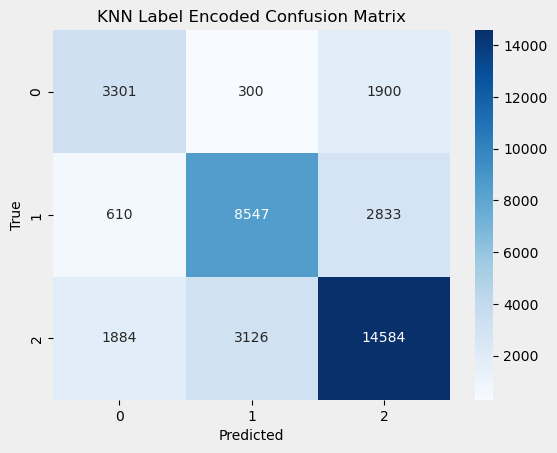

In [639]:
# Compute and plot confusion matrix for KNN
cm = confusion_matrix(y,y_pred_knn)
plt.figure(figsize=(6,5))
plt.figure(facecolor="#efefef")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("KNN Label Encoded Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('/Users/debaoli/Desktop/knncm.png', format='png')

print("=== Classification Report ===")
print(classification_report(y, y_pred_knn))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.62      0.61      0.62      5501
           1       0.72      0.72      0.72     11990
           2       0.75      0.75      0.75     19594

    accuracy                           0.72     37085
   macro avg       0.69      0.70      0.69     37085
weighted avg       0.72      0.72      0.72     37085



<Figure size 600x500 with 0 Axes>

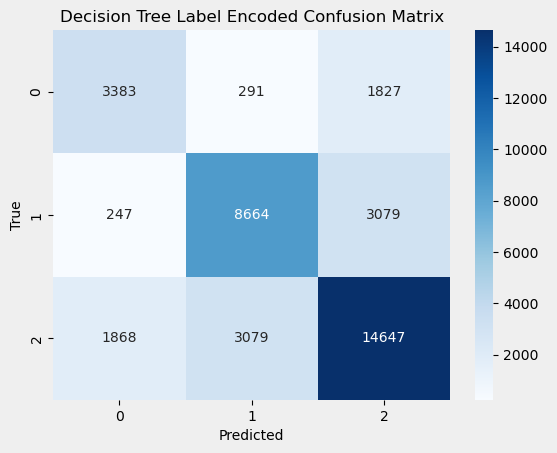

In [637]:
# Compute and plot confusion matrix
cm = confusion_matrix(y,y_pred_dtree)
plt.figure(figsize=(6,5))
plt.figure(facecolor="#efefef")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Label Encoded Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('/Users/debaoli/Desktop/dtreecm.png', format='png')

print("=== Classification Report ===")
print(classification_report(y, y_pred_dtree))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      5501
           1       0.78      0.79      0.79     11990
           2       0.80      0.80      0.80     19594

    accuracy                           0.78     37085
   macro avg       0.76      0.76      0.76     37085
weighted avg       0.78      0.78      0.78     37085



<Figure size 600x500 with 0 Axes>

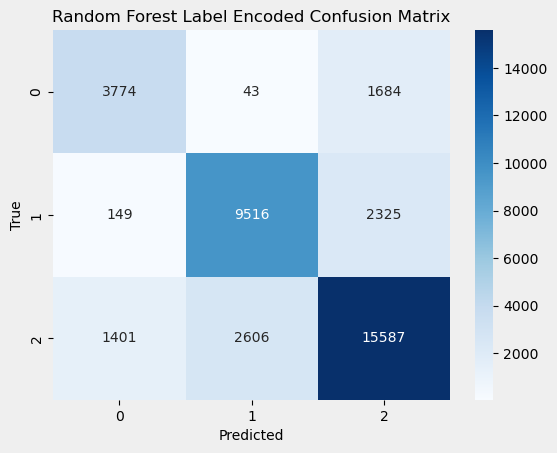

In [635]:
# Compute and plot confusion matrix for KNN
cm = confusion_matrix(y,y_pred_rf)
plt.figure(figsize=(6,5))
plt.figure(facecolor="#efefef")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Label Encoded Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('/Users/debaoli/Desktop/rfcm.png', format='png')

print("=== Classification Report ===")
print(classification_report(y, y_pred_rf))